# Importing Libraries

In [39]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler

# Load the dataset

In [40]:
data = pd.read_csv('Mall_Customers.csv')
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [41]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


# Univariate Analysis

C:\Users\elams\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Age', ylabel='Density'>

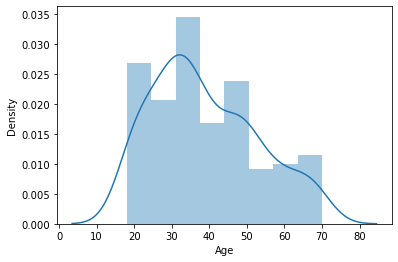

In [42]:
sns.distplot(data.Age)

C:\Users\elams\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:ylabel='Gender'>

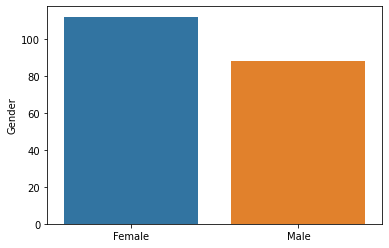

In [43]:
sns.barplot(data.Gender.value_counts().index,data.Gender.value_counts())

# Bivariate Analysis

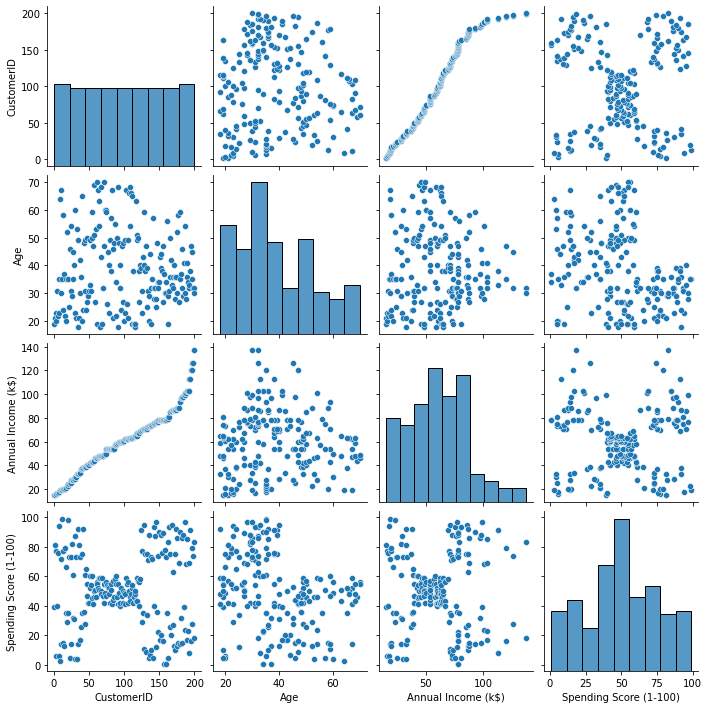

In [44]:
sns.pairplot(data)

# Multivariate Analysis

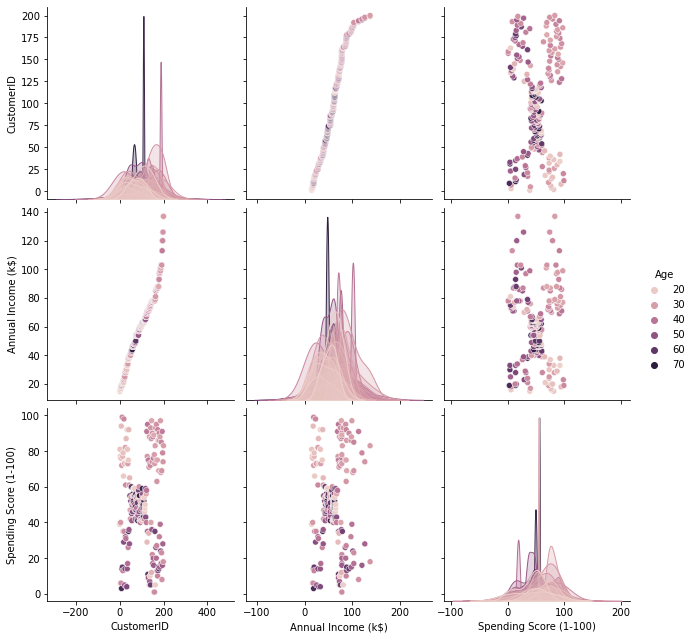

In [45]:
sns.pairplot(data,hue = 'Age',height = 3)

# Descriptive Statistics

In [46]:
 data.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


# Handle Missing Values

In [47]:
data.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [48]:
data.Gender.value_counts()

Female    112
Male       88
Name: Gender, dtype: int64

# Outlier Analysis

C:\Users\elams\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Age'>

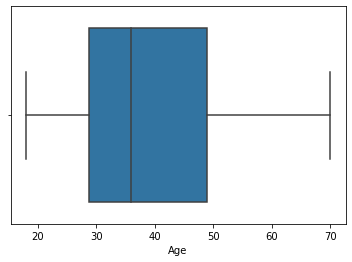

In [49]:
sns.boxplot(data.Age)

C:\Users\elams\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Spending Score (1-100)'>

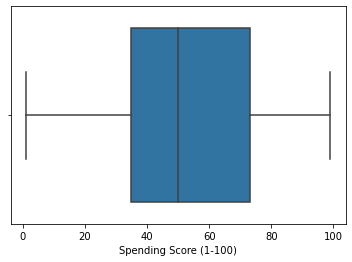

In [50]:
sns.boxplot(data['Spending Score (1-100)'])

# Encoding Categorical Column

In [51]:
le=LabelEncoder()

In [52]:
data.Gender=le.fit_transform(data.Gender)

In [53]:
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,1,19,15,39
1,2,1,21,15,81
2,3,0,20,16,6
3,4,0,23,16,77
4,5,0,31,17,40


# Perform Clustering Algorithm

In [54]:
from sklearn import cluster

In [55]:
error =[]
for i in range(1,11):
    kmeans=cluster.KMeans(n_clusters=i,init='k-means++',random_state=0)
    kmeans.fit(data)
    error.append(kmeans.inertia_)

C:\Users\elams\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


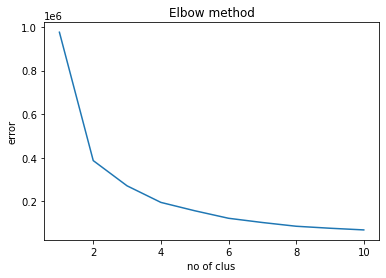

In [56]:
plt.plot(range(1,11),error)
plt.title('Elbow method')
plt.xlabel('no of clus')
plt.ylabel('error')
plt.show()


In [60]:
km_model=cluster.KMeans(n_clusters=2,init='k-means++',random_state=0)

In [61]:
km_model.fit(data)

KMeans(n_clusters=2, random_state=0)

In [63]:
ykmeans =km_model.predict(data)
km_model.predict([[5.1,3.5,1.4,0.2,1]])

C:\Users\elams\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


array([1])

# Encoding the cluster

In [64]:
data['kclus'] = pd.Series(ykmeans)
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),kclus
0,1,1,19,15,39,1
1,2,1,21,15,81,1
2,3,0,20,16,6,1
3,4,0,23,16,77,1
4,5,0,31,17,40,1


In [65]:
data['kclus'].value_counts()

0    101
1     99
Name: kclus, dtype: int64

# Split the data into Independent and Dependent variable

In [66]:
X= data.iloc[:,:-1]
X.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,1,19,15,39
1,2,1,21,15,81
2,3,0,20,16,6
3,4,0,23,16,77
4,5,0,31,17,40


In [67]:
y=data.kclus
y.head()

0    1
1    1
2    1
3    1
4    1
Name: kclus, dtype: int32

# Scaling Independent variable

In [68]:
scale=MinMaxScaler()
X_scaled=pd.DataFrame(scale.fit_transform(X),columns=X.columns)
X_scaled.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,0.000000,1.0,0.019231,0.000000,0.387755
1,0.005025,1.0,0.057692,0.000000,0.816327
2,0.010050,0.0,0.038462,0.008197,0.051020
3,0.015075,0.0,0.096154,0.008197,0.775510
4,0.020101,0.0,0.250000,0.016393,0.397959


# Split the Data into Training and Tesing

In [69]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state = 1)

# Model Building

In [70]:
from sklearn.neighbors import KNeighborsClassifier
model =KNeighborsClassifier()
model.fit(x_train,y_train)
KNeighborsClassifier()
y_pred = model.predict(x_test)
y_pred1 = model.predict(x_train)

# Evaluation Metrics

In [71]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
print('Test accuracy score: ',accuracy_score(y_test,y_pred))
print('Training accuracy score: ',accuracy_score(y_train,y_pred1))

Test accuracy score:  0.925
Training accuracy score:  0.99375


In [72]:
pd.crosstab(y_test,y_pred)

col_0,0,1
kclus,,
0,17,0
1,3,20


In [73]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.85      1.00      0.92        17
           1       1.00      0.87      0.93        23

    accuracy                           0.93        40
   macro avg       0.93      0.93      0.92        40
weighted avg       0.94      0.93      0.93        40

